In [55]:
import numpy as np
import pandas as pd
import torch

torch.cuda.is_available()

True

In [56]:
DATA_PATH = "../input/creditcardfraud/creditcard.csv"
BATCH_SIZE = 64
NOISE_DIM = 32
FEATURES_DIM = 28
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0003
TRAIN_EPOCHS = 16
TRAIN_STEPS = 64
K_DISCRIMINATOR_STEPS = 5

In [57]:
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


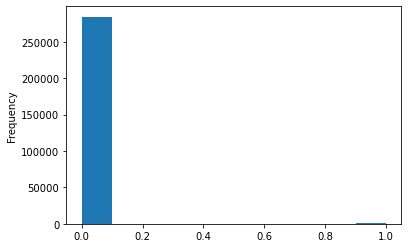

In [59]:
df["Class"].plot.hist();

In [60]:
TRAINING_SET = df[df.Class == 1]
TRAINING_SET.size

15252

In [61]:
TRAINING_SET.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [62]:
TRAINING_SET = TRAINING_SET.drop(columns=['Time', 'Amount', 'Class'])
TRAINING_SET.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793


In [63]:
class CreditCardDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
    def __len__(self):
        return len(self.dataframe)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return np.array(self.dataframe.iloc[idx], dtype=np.float32)

In [64]:
creditCardDataset = CreditCardDataset(TRAINING_SET)
creditCardDataLoader = torch.utils.data.DataLoader(
    creditCardDataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    drop_last=True
)

In [65]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fcn = torch.nn.Sequential(
            torch.nn.Linear(
                in_features=NOISE_DIM,
                out_features=128,
                bias=True
            ),
            torch.nn.ReLU(),
            torch.nn.Linear(
                in_features=128,
                out_features=256,
                bias=True
            ),
            torch.nn.ReLU(),
            torch.nn.Linear(
                in_features=256,
                out_features=FEATURES_DIM,
                bias=True
            ),
            torch.nn.Tanh(),
        )
    def forward(self, batch):
        return self.fcn(batch)

In [66]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fcn = torch.nn.Sequential(
            torch.nn.Linear(
                in_features=FEATURES_DIM,
                out_features=256,
                bias=True
            ),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(
                in_features=256,
                out_features=256,
                bias=True
            ),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(
                in_features=256,
                out_features=1,
                bias=True
            ),
            torch.nn.Sigmoid(),
        )
    def forward(self, batch):
        return self.fcn(batch)

In [67]:
generator = Generator()
discriminator = Discriminator()

generatorOptimizer = torch.optim.Adam(
    generator.parameters(),
    lr=GENERATOR_LEARNING_RATE
)

discriminatorOptimizer = torch.optim.Adam(
    discriminator.parameters(),
    lr=DISCRIMINATOR_LEARNING_RATE
)

criterion = torch.nn.BCELoss()

In [68]:
realLabels = torch.ones(BATCH_SIZE, 1)
fakeLabels = torch.zeros(BATCH_SIZE, 1)

In [69]:
itrDataLoader = iter(creditCardDataLoader)
for e in range(TRAIN_EPOCHS):
    for s in range(TRAIN_STEPS):
        # Train Discriminator K Steps
        for k in range(K_DISCRIMINATOR_STEPS):
            try:
                xReal = next(itrDataLoader)
            except:
                itrDataLoader = iter(creditCardDataLoader)
                xReal = next(itrDataLoader)
            zNoise = torch.randn(BATCH_SIZE, NOISE_DIM)
            xFake = generator(zNoise)
            discriminatorOptimizer.zero_grad()
            yReal = discriminator(xReal)
            yFake = discriminator(xFake)
            dX = criterion(yReal, realLabels)
            dGz = criterion(yFake, fakeLabels)
            dX.backward()
            dGz.backward()
            discriminatorOptimizer.step()
        # Train Generator
        zNoise = torch.randn(BATCH_SIZE, NOISE_DIM)
        generatorOptimizer.zero_grad()
        gZ = generator(zNoise)
        dGz = discriminator(gZ)
        gLoss = criterion(dGz, realLabels)
        gLoss.backward()
        generatorOptimizer.step()
    if e % 10 == 0:
        print("E:{}".format(e))

E:0
E:10


In [77]:
zNoise = torch.randn(5, NOISE_DIM)
gZ = generator(zNoise)
pd.DataFrame(gZ.detach().numpy())

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.